<a href="https://colab.research.google.com/github/darkginka/Disease-Based-Diet-Recommanded-System/blob/main/DRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Start**

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
import pandas as pd

In [146]:
####### dataset #######
food_nutrition = pd.read_csv("/content/drive/MyDrive/dataset/food_nutrition.csv")
disease_nutrition = pd.read_csv("/content/drive/MyDrive/dataset/disease_nutrition.csv",encoding='unicode_escape')

In [147]:
#food_nutrition.shape
food_nutrition.head()

,Category,Description,NutrientDataBankNumber,Carotene,Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,Lutein and Zeaxanthin,...,Potassium,Sodium,Zinc,Vitamin_A,Vitamin_B12,Vitamin_B6,Vitamin_C,Vitamin_D,Vitamin_E,Vitamin_K
0,Milk,"Milk, human",11000000,7,0,6.89,14,16.0,0.0,0,...,51,17,0.17,61,0.05,0.011,5.0,0.014,0.08,0.3
1,Milk,"Milk, NFS",11100000,4,0,4.87,8,17.9,0.0,0,...,157,39,0.42,59,0.56,0.060,0.1,0.057,0.03,0.2
2,Milk,"Milk, whole",11111000,7,0,4.67,12,17.8,0.0,0,...,150,38,0.41,32,0.54,0.061,0.0,0.056,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,7,0,4.46,14,16.0,0.0,0,...,253,3,0.38,29,0.36,0.034,0.9,0.020,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,7,0,4.67,12,17.8,0.0,0,...,150,38,0.41,32,0.54,0.061,0.0,0.056,0.05,0.3


In [148]:
df_int = food_nutrition.select_dtypes(include=['int'])
# dataframe with integer format Data Types to Float
df_int

,NutrientDataBankNumber,Carotene,Cryptoxanthin,Cholesterol,Lutein and Zeaxanthin,Lycopene,Retinol,Calcium,Magnesium,Phosphorus,Potassium,Sodium,Vitamin_A
0,11000000,7,0,14,0,0,60,32,3,14,51,17,61
1,11100000,4,0,8,0,0,58,126,12,103,157,39,59
2,11111000,7,0,12,0,0,31,123,12,101,150,38,32
3,11111100,7,0,14,0,0,28,101,5,86,253,3,29
4,11111150,7,0,12,0,0,31,123,12,101,150,38,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6327,99997802,464,0,0,142,2597,0,14,13,30,278,6,43
6328,99997804,11,0,0,18,0,0,6,11,96,364,6,1
6329,99997810,994,0,0,225,458,0,22,18,46,312,19,98
6330,99998130,194,4,13,112,7237,4,18,13,33,190,845,21


In [149]:
int_columns=['Carotene','Cryptoxanthin','Cholesterol','Lutein and Zeaxanthin',
             'Lycopene','Retinol','Calcium','Magnesium','Phosphorus','Potassium','Sodium','Vitamin_A']
# Replace Data Types to Float
food_nutrition[int_columns] = food_nutrition[int_columns].astype('float')

In [150]:
# replacing na values in college with 0
food_nutrition.fillna(value = 0, inplace = True)

In [151]:
# remove rocords contains beaf, steck, pork 
food_nutrition = food_nutrition[food_nutrition["Description"].str.contains("beaf") == False]

In [152]:
# replacing na values in college with 0
disease_nutrition.fillna(value = 0, inplace = True)

In [153]:
disease_nutrition.info()
# disease_nutrition.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   disease_id             91 non-null     int64 
 1   disease                91 non-null     object
 2   ineficient_nutritions  91 non-null     object
 3   Precaution_1           91 non-null     object
 4   Precaution_2           91 non-null     object
 5   Precaution_3           91 non-null     object
 6   Precaution_4           91 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.1+ KB


In [154]:
list_of_disease = disease_nutrition['disease'].to_list()
xyz={"diseases":list_of_disease}
# xyz

**Part-1**

In [155]:
####### Methods #######
def get_disease(disease_name):
	if(disease_name not in list(disease_nutrition["disease"])):
		return False
	else:
		return disease_nutrition[disease_nutrition.disease==disease_name]["disease"].values[0]

def get_disease_id(disease):
	return disease_nutrition[disease_nutrition.disease == disease]["disease_id"].values[0]

def get_disease_ie(disease):
	return disease_nutrition[disease_nutrition.disease == disease]["ineficient_nutritions"].values[0]

In [156]:
####### get-set Data #######
users_disease = input("Enter Disease Name: ")
disease_name = get_disease(users_disease)
if(disease_name==False):
  print("Disease Not Found")
else:
  disease_id = get_disease_id(disease_name)
  i= disease_id-92
  fd= disease_nutrition.iloc[i]
  pre_list = [fd["Precaution_1"],fd["Precaution_2"],fd["Precaution_3"],fd["Precaution_4"]]
  print("Precauctions: ",pre_list)         
  disease_ie = get_disease_ie(disease_name)
  dis_list = list(disease_ie.split(" "))
  for ele in dis_list:
    if(ele==""):
      dis_list.remove(ele)
  print("Ineficient Nnutritions: ",dis_list)

Enter Disease Name: acne
Precauctions:  ['bath twice', 'avoid fatty spicy food', 'drink plenty of Water', 'avoid too many products']
Ineficient Nnutritions:  ['SaturatedFat', 'Fiber', 'Riboflavin', 'Vitamin_A', 'Zinc', 'Vitamin_D', 'Vitamin_E']


**Part-2**

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

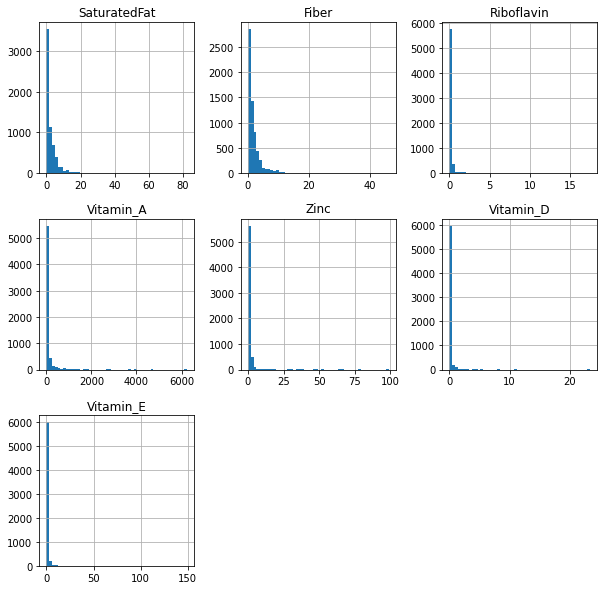

In [158]:
food_nutrition[dis_list].hist(bins=50, figsize=(10,10))
plt.show()

**Preprocessing data**

In [159]:
from sklearn.preprocessing import MinMaxScaler

In [160]:
columns_to_cluster = dis_list

In [161]:
#MinMaxScaler
#Transform features by scaling each feature to a given range.Here is an example to scale a data matrix to the [0, 1] range:
mms = MinMaxScaler()
food_scaled = mms.fit_transform(food_nutrition[columns_to_cluster])
print("Scaled Food Value: ", food_scaled[0,:])

Scaled Food Value:  [0.02435152 0.         0.00205714 0.0097522  0.0017196  0.00059893
 0.00053548]


In [162]:
columns_to_cluster_scaled = []
for i in dis_list:
  columns_to_cluster_scaled.append(i+"_scaled")

In [163]:
df_food_scaled = pd.DataFrame(food_scaled, columns=columns_to_cluster_scaled)

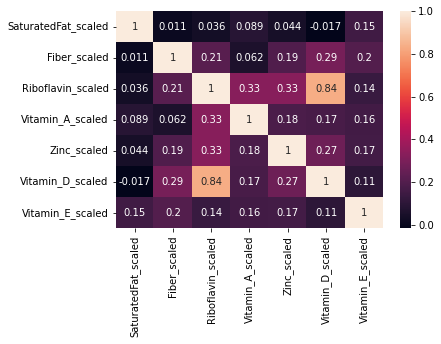

In [164]:
ax = sns.heatmap(df_food_scaled.corr(), annot=True)
plt.show()

**Training the model**

In [165]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [166]:
n_clusters = range(2,21)
ssd = []
sc = []
dict={}
for n in n_clusters:
    km = KMeans(n_clusters=n, max_iter=300, n_init=10, init='k-means++', random_state=42)
    km.fit(food_scaled)
    preds = km.predict(food_scaled) 
    centers = km.cluster_centers_ 
    ssd.append(km.inertia_) 
    score = silhouette_score(food_scaled, preds, metric='euclidean')
    sc.append(score)                                                             #calculate the goodness of a clustering
    print("Number of Clusters = {}, Silhouette Score = {}".format(n, score))
    dict[n] = score


Number of Clusters = 2, Silhouette Score = 0.6323501656425353
Number of Clusters = 3, Silhouette Score = 0.5883435112707048
Number of Clusters = 4, Silhouette Score = 0.5958672549990905
Number of Clusters = 5, Silhouette Score = 0.5421756748924406
Number of Clusters = 6, Silhouette Score = 0.3933382110515812
Number of Clusters = 7, Silhouette Score = 0.4030905206718632
Number of Clusters = 8, Silhouette Score = 0.36280266075311857
Number of Clusters = 9, Silhouette Score = 0.3639610502373998
Number of Clusters = 10, Silhouette Score = 0.3743216120814354
Number of Clusters = 11, Silhouette Score = 0.37576417736469303
Number of Clusters = 12, Silhouette Score = 0.3849572125930139
Number of Clusters = 13, Silhouette Score = 0.3076206527886597
Number of Clusters = 14, Silhouette Score = 0.303461337098808
Number of Clusters = 15, Silhouette Score = 0.30896828324444237
Number of Clusters = 16, Silhouette Score = 0.3113928218474605
Number of Clusters = 17, Silhouette Score = 0.305259033166040

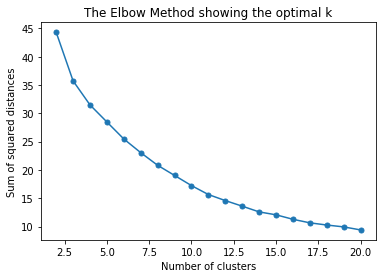

In [167]:
plt.plot(n_clusters, ssd, marker='.', markersize=10,animated=True)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [168]:
k=6
model = KMeans(n_clusters=k, random_state=42).fit(food_scaled)
pred = model.predict(food_scaled)
# print(pred)
# print(model.labels_)
print('10 first clusters: ', model.labels_[:10])

10 first clusters:  [0 0 0 0 0 0 0 0 0 0]


**Visualizing the clusters**

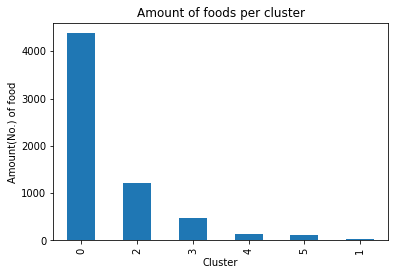

In [169]:
df_food_scaled['cluster'] = model.labels_
df_food_scaled['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount(No.) of food')
plt.title('Amount of foods per cluster')
plt.show()

In [170]:
display(df_food_scaled['cluster'].value_counts())
minor_cluster = df_food_scaled['cluster'].value_counts().tail(1)
print("Amount of food in the smallest cluster: ", int(minor_cluster.values))

0    4378
2    1210
3     479
4     132
5     105
1      28
Name: cluster, dtype: int64

Amount of food in the smallest cluster:  28


In [171]:
df_food_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6332 entries, 0 to 6331
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SaturatedFat_scaled  6332 non-null   float64
 1   Fiber_scaled         6332 non-null   float64
 2   Riboflavin_scaled    6332 non-null   float64
 3   Vitamin_A_scaled     6332 non-null   float64
 4   Zinc_scaled          6332 non-null   float64
 5   Vitamin_D_scaled     6332 non-null   float64
 6   Vitamin_E_scaled     6332 non-null   float64
 7   cluster              6332 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 371.1 KB


In [172]:
food_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6332 entries, 0 to 6331
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                6332 non-null   object 
 1   Description             6332 non-null   object 
 2   NutrientDataBankNumber  6332 non-null   int64  
 3   Carotene                6332 non-null   float64
 4   Cryptoxanthin           6332 non-null   float64
 5   Carbohydrate            6332 non-null   float64
 6   Cholesterol             6332 non-null   float64
 7   Choline                 6332 non-null   float64
 8   Fiber                   6332 non-null   float64
 9   Lutein and Zeaxanthin   6332 non-null   float64
 10  Lycopene                6332 non-null   float64
 11  Niacin                  6332 non-null   float64
 12  Protein                 6332 non-null   float64
 13  Retinol                 6332 non-null   float64
 14  Riboflavin              6332 non-null   

In [173]:
df_food_joined = pd.concat([food_nutrition,df_food_scaled], axis=1).set_index('cluster')

for cluster in range(k):
    display(df_food_joined.loc[cluster, ['Description']].sample(frac=1).head(10))

,Description
cluster,
0,"Bread, sour dough"
0,"Chicken, bacon, and tomato club sandwich, with..."
0,"Infant formula, powder, made with baby water (..."
0,"Sugar, brown"
0,"Sweet potato, NFS"
0,"Perch, coated, fried, made with oil"
0,"Pancake syrup, light"
0,"Shrimp, coated, fried, made with margarine"
0,"Croaker, coated, baked or broiled, fat added"


,Description
cluster,
1,Cereal (Kashi GOLEAN)
1,"Cereal or granola bar, high fiber, coated with..."
1,"Cocoa powder, not reconstituted"
1,Cereal (Post Bran Flakes)
1,Cereal or granola bar (General Mills Fiber One...
1,Cereal (Barbara's Puffins)
1,"Wheat bran, unprocessed"
1,Nutritional powder mix (Kellogg's Special K20 ...
1,"Wheat germ, plain"


,Description
cluster,
2,"Peanuts, sugar-coated"
2,"Potato skins, with cheese"
2,"Light ice cream bar, vanilla"
2,"Burrito, taco, or quesadilla with egg and brea..."
2,"Fudge, peanut butter"
2,"Biscuit, cheese"
2,"Cheese, Cheddar, reduced fat"
2,"Cashews, NFS"
2,"Cookie, oatmeal, with chocolate chips"


,Description
cluster,
3,"Muffin, English, wheat or cracked wheat, with ..."
3,"Bread, pita, wheat or cracked wheat, toasted"
3,Cereal (Post Honey Bunches of Oats with Almonds)
3,"Popcorn, microwave, plain, light"
3,Cracker chips
3,"Pecans, honey roasted"
3,"Cake, carrot, diet"
3,"Bread, multigrain, with raisins"
3,"Pinto beans, NFS"


,Description
cluster,
4,Chocolate-flavored sprinkles
4,"Coconut candy, no chocolate covering"
4,Butterscotch morsels
4,"Quiche with meat, poultry or fish"
4,Whipped topping
4,"Cheese, Mexican blend"
4,Animal fat or drippings
4,"Coconut, fresh"
4,"Cheese, Colby"


,Description
cluster,
5,"Liver, beef or calves, and onions"
5,Cereal (General Mills Reese's Puffs)
5,"Cereal, chocolate flavored, frosted, puffed corn"
5,"Livers, chicken, chopped, with eggs and onion"
5,Cereal (Malt-O-Meal Cinnamon Toasters)
5,Cereal (General Mills Cheerios Chocolate)
5,Cereal (General Mills Frankenberry)
5,Cereal (General Mills Cheerios Protein)
5,Cereal (Kellogg's All-Bran Complete Wheat Flakes)


In [174]:
df_food_joined.head(5)
# df_food_joined.info()

,Category,Description,NutrientDataBankNumber,Carotene,Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,Lutein and Zeaxanthin,...,Vitamin_D,Vitamin_E,Vitamin_K,SaturatedFat_scaled,Fiber_scaled,Riboflavin_scaled,Vitamin_A_scaled,Zinc_scaled,Vitamin_D_scaled,Vitamin_E_scaled
cluster,,,,,,,,,,,,,,,,,,,,,
0,Milk,"Milk, human",11000000,7.0,0.0,6.89,14.0,16.0,0.0,0.0,...,0.014,0.08,0.3,0.024352,0.0,0.002057,0.009752,0.001720,0.000599,0.000535
0,Milk,"Milk, NFS",11100000,4.0,0.0,4.87,8.0,17.9,0.0,0.0,...,0.057,0.03,0.2,0.014109,0.0,0.007829,0.009432,0.004248,0.002439,0.000201
0,Milk,"Milk, whole",11111000,7.0,0.0,4.67,12.0,17.8,0.0,0.0,...,0.056,0.05,0.3,0.022545,0.0,0.007886,0.005116,0.004147,0.002396,0.000335
0,Milk,"Milk, low sodium, whole",11111100,7.0,0.0,4.46,14.0,16.0,0.0,0.0,...,0.020,0.08,0.3,0.026109,0.0,0.006000,0.004636,0.003844,0.000856,0.000535
0,Milk,"Milk, calcium fortified, whole",11111150,7.0,0.0,4.67,12.0,17.8,0.0,0.0,...,0.056,0.05,0.3,0.022545,0.0,0.007886,0.005116,0.004147,0.002396,0.000335


**Applying PCA to visualize the clusters**

In [175]:
from sklearn.decomposition import PCA

In [176]:
pca = PCA(n_components=len(dis_list), random_state=42)
food_pca = pca.fit_transform(food_scaled)
pca.explained_variance_ratio_.sum()

1.0000000000000002

In [177]:
column_list=[]
for i in range(len(dis_list)):
  column_list.append("PC"+str(i))
print(column_list)

['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']


In [178]:
df_pca = pd.DataFrame(food_pca, columns=column_list)
df_pca['cluster'] = model.labels_
# df_pca.head()
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6332 entries, 0 to 6331
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PC0      6332 non-null   float64
 1   PC1      6332 non-null   float64
 2   PC2      6332 non-null   float64
 3   PC3      6332 non-null   float64
 4   PC4      6332 non-null   float64
 5   PC5      6332 non-null   float64
 6   PC6      6332 non-null   float64
 7   cluster  6332 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 371.1 KB


In [179]:
sampled_clusters_pca = pd.DataFrame()

for c in df_pca.cluster.unique():
    df_cluster_sampled_pca = df_pca[df_pca.cluster == c].sample(n=int(minor_cluster), random_state=42)
    sampled_clusters_pca = pd.concat([sampled_clusters_pca,df_cluster_sampled_pca], axis=0)
sampled_clusters_pca.cluster.value_counts()

0    28
2    28
4    28
1    28
3    28
5    28
Name: cluster, dtype: int64

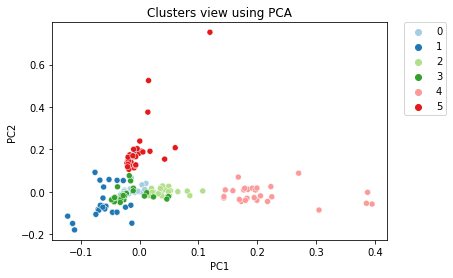

In [180]:
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=sampled_clusters_pca, legend="full", palette='Paired')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using PCA')
plt.show()

In [181]:
df_user_food_joined = pd.concat([food_nutrition,df_food_scaled], axis=1).set_index('cluster')
for cluster in df_food_scaled['cluster'].unique():
    display(df_user_food_joined.loc[cluster, ['Description']].sample(frac=1).head(10))

,Description
cluster,
0,"Chicken breast, fried, coated, skin / coating ..."
0,"Light ice cream, vanilla"
0,"Fish and vegetables excluding carrots, broccol..."
0,"Egg omelet or scrambled egg, with meat and dar..."
0,Dietetic or low calorie mints
0,"Fruit cocktail, canned, NFS"
0,"Carrots and beef, baby food, strained"
0,"Honeydew melon, raw"
0,"Breadsticks, soft, from fast food / restaurant"


,Description
cluster,
2,Egg and sausage on biscuit
2,"Egg omelet or scrambled egg, with meat and tom..."
2,Egg and cheese on biscuit
2,"Cheese sandwich, American cheese, on white bre..."
2,"Chicken wing, rotisserie"
2,"Cookie, marshmallow, with rice cereal and choc..."
2,"Egg omelet or scrambled egg, with vegetables o..."
2,"Gelato, vanilla"
2,Macaroni or noodles with cheese and meat


,Description
cluster,
4,Brioche
4,"Cheese, NFS"
4,"Almonds, yogurt-covered"
4,"Cheese, Mexican blend"
4,Truffles
4,Wheat germ oil
4,"Coconut candy, chocolate covered"
4,"Cheese, Brie"
4,"Milk chocolate candy, with cereal"


,Description
cluster,
1,"Crackers, crispbread"
1,Cereal (General Mills Fiber One Raisin Bran Cl...
1,"Wheat bran, unprocessed"
1,Nutritional powder mix (Kellogg's Special K20 ...
1,Yeast
1,"Cookie, oatmeal, reduced fat, NS as to raisins"
1,"Wheat germ, plain"
1,"Vegetable mixture, dried"
1,Nutritional powder mix (Slim Fast)


,Description
cluster,
3,"Sweet potato tots, from frozen, fried"
3,"Passion fruit, raw"
3,Black beans and brown rice
3,"Almonds, honey roasted"
3,"Lentils, NFS"
3,Cereal (Kellogg's Special K Fruit & Yogurt)
3,Cereal (Kellogg's Low Fat Granola)
3,M&M's Almond Chocolate Candies
3,"Artichoke, fresh, cooked, fat added"


,Description
cluster,
5,Oysters Rockefeller
5,Cereal (Malt-O-Meal Colossal Crunch)
5,Cereal (Malt-O-Meal Honey Nut Toasty O's)
5,"Cereal, frosted oat cereal with marshmallows"
5,Cereal (General Mills Reese's Puffs)
5,"Liver, beef or calves, and onions"
5,"Rice cereal with bananas, baby food, dry, instant"
5,Cereal (Kellogg's Crispix)
5,Cereal (General Mills Cookie Crisp)


In [182]:
# df_user_food_joined.info()
df_user_food_joined.head()

,Category,Description,NutrientDataBankNumber,Carotene,Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,Lutein and Zeaxanthin,...,Vitamin_D,Vitamin_E,Vitamin_K,SaturatedFat_scaled,Fiber_scaled,Riboflavin_scaled,Vitamin_A_scaled,Zinc_scaled,Vitamin_D_scaled,Vitamin_E_scaled
cluster,,,,,,,,,,,,,,,,,,,,,
0,Milk,"Milk, human",11000000,7.0,0.0,6.89,14.0,16.0,0.0,0.0,...,0.014,0.08,0.3,0.024352,0.0,0.002057,0.009752,0.001720,0.000599,0.000535
0,Milk,"Milk, NFS",11100000,4.0,0.0,4.87,8.0,17.9,0.0,0.0,...,0.057,0.03,0.2,0.014109,0.0,0.007829,0.009432,0.004248,0.002439,0.000201
0,Milk,"Milk, whole",11111000,7.0,0.0,4.67,12.0,17.8,0.0,0.0,...,0.056,0.05,0.3,0.022545,0.0,0.007886,0.005116,0.004147,0.002396,0.000335
0,Milk,"Milk, low sodium, whole",11111100,7.0,0.0,4.46,14.0,16.0,0.0,0.0,...,0.020,0.08,0.3,0.026109,0.0,0.006000,0.004636,0.003844,0.000856,0.000535
0,Milk,"Milk, calcium fortified, whole",11111150,7.0,0.0,4.67,12.0,17.8,0.0,0.0,...,0.056,0.05,0.3,0.022545,0.0,0.007886,0.005116,0.004147,0.002396,0.000335


**Recommending Food**

In [183]:
df_user_food_joined.reset_index(inplace=True)
cluster_pct = df_user_food_joined.cluster.value_counts(normalize=True)*20

if int(cluster_pct.round(0).sum()) < 20:
    cluster_pct[cluster_pct < 0.5] = cluster_pct[cluster_pct < 0.5] + 1.0
    
display(cluster_pct)
print('Total food: ', int(cluster_pct.round(0).sum()))

0    13.828174
2     3.821857
3     1.512950
4     0.416930
5     0.331649
1     0.088440
Name: cluster, dtype: float64

Total food:  20


In [184]:
df_food_joined.reset_index(inplace=True)
df_food_joined.head(3)

,cluster,Category,Description,NutrientDataBankNumber,Carotene,Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,...,Vitamin_D,Vitamin_E,Vitamin_K,SaturatedFat_scaled,Fiber_scaled,Riboflavin_scaled,Vitamin_A_scaled,Zinc_scaled,Vitamin_D_scaled,Vitamin_E_scaled
0,0,Milk,"Milk, human",11000000,7.0,0.0,6.89,14.0,16.0,0.0,...,0.014,0.08,0.3,0.024352,0.0,0.002057,0.009752,0.001720,0.000599,0.000535
1,0,Milk,"Milk, NFS",11100000,4.0,0.0,4.87,8.0,17.9,0.0,...,0.057,0.03,0.2,0.014109,0.0,0.007829,0.009432,0.004248,0.002439,0.000201
2,0,Milk,"Milk, whole",11111000,7.0,0.0,4.67,12.0,17.8,0.0,...,0.056,0.05,0.3,0.022545,0.0,0.007886,0.005116,0.004147,0.002396,0.000335


In [185]:
df_user_food_joined['cluster_pct'] = df_user_food_joined['cluster'].apply(lambda c: cluster_pct[c])
df_user_food_joined.drop(columns=columns_to_cluster_scaled, inplace=True)
df_user_food_joined.head(3)

,cluster,Category,Description,NutrientDataBankNumber,Carotene,Cryptoxanthin,Carbohydrate,Cholesterol,Choline,Fiber,...,Sodium,Zinc,Vitamin_A,Vitamin_B12,Vitamin_B6,Vitamin_C,Vitamin_D,Vitamin_E,Vitamin_K,cluster_pct
0,0,Milk,"Milk, human",11000000,7.0,0.0,6.89,14.0,16.0,0.0,...,17.0,0.17,61.0,0.05,0.011,5.0,0.014,0.08,0.3,13.828174
1,0,Milk,"Milk, NFS",11100000,4.0,0.0,4.87,8.0,17.9,0.0,...,39.0,0.42,59.0,0.56,0.060,0.1,0.057,0.03,0.2,13.828174
2,0,Milk,"Milk, whole",11111000,7.0,0.0,4.67,12.0,17.8,0.0,...,38.0,0.41,32.0,0.54,0.061,0.0,0.056,0.05,0.3,13.828174


**Appying Random Forest**

In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [187]:
X=df_food_scaled[columns_to_cluster_scaled]   # Features
y=df_food_scaled['cluster']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [188]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
#Train the model using the training sets 
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 4, 0, 0], dtype=int32)

In [189]:
clf.estimators_[0]
sample_tree = clf.estimators_[20]

In [190]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [191]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['K1', 'K2','K3', 'K4','K5', 'K6'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

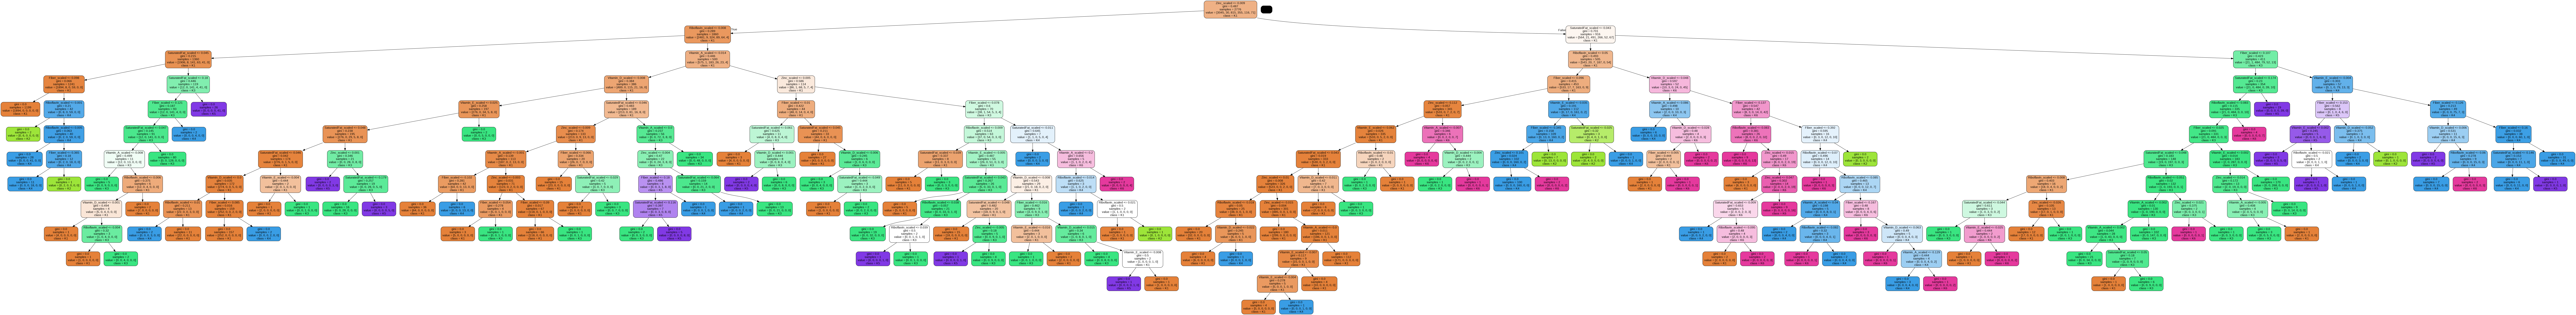

In [192]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

In [193]:
clf.feature_importances_

array([0.5175147 , 0.23569084, 0.04698003, 0.03947199, 0.08454081,
       0.04278764, 0.033014  ])

In [194]:
imp_df = pd.DataFrame({
    "Nutritions": X_train.columns,
    "Importance": clf.feature_importances_
})

In [195]:
imp_df.sort_values(by="Importance", ascending=False)

,Nutritions,Importance
0,SaturatedFat_scaled,0.517515
1,Fiber_scaled,0.235691
4,Zinc_scaled,0.084541
2,Riboflavin_scaled,0.046980
5,Vitamin_D_scaled,0.042788
3,Vitamin_A_scaled,0.039472
6,Vitamin_E_scaled,0.033014


In [196]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [197]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9842105263157894


In [198]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1322,    0,    8,    0,    0,    3],
       [   0,    1,    0,    1,    0,    0],
       [   9,    0,  340,    3,    0,    0],
       [   0,    0,    0,  137,    0,    2],
       [   0,    0,    0,    0,   43,    0],
       [   1,    0,    1,    2,    0,   27]])

In [199]:
from sklearn.metrics import classification_report

In [200]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1333
           1       1.00      0.50      0.67         2
           2       0.97      0.97      0.97       352
           3       0.96      0.99      0.97       139
           4       1.00      1.00      1.00        43
           5       0.84      0.87      0.86        31

    accuracy                           0.98      1900
   macro avg       0.96      0.89      0.91      1900
weighted avg       0.98      0.98      0.98      1900



In [201]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm)

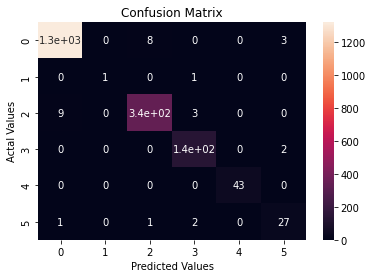

In [202]:
#Plotting the confusion matrix
ax = sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [203]:
final_Food = pd.DataFrame()

for ncluster, pct in cluster_pct.items():
    foods = df_food_joined[df_food_joined['cluster'] == ncluster].sample(n=int(round(pct, 0)))
    final_Food = pd.concat([final_Food,foods], ignore_index=True)
    if len(final_Food) > 20 :
        flag = 20 - len(final_Food)
        final_Food = final_Food[:flag]
# final_Food.head(10)

In [204]:
final_Food[['Description']]

,Description
0,"Asparagus, fresh, cooked with oil"
1,"Infant formula, liquid concentrate, made with ..."
2,"Creamed christophine, Puerto Rican style"
3,"Flowers or blossoms of sesbania, squash, or li..."
4,Sports drink (Gatorade G)
5,"Cauliflower, fresh, cooked with oil"
6,"Pudding, flavors other than chocolate, ready-t..."
7,"Chicken or turkey, potatoes, and vegetables ex..."
8,"Fruit juice drink, added calcium (Sunny D)"
9,"Chicken drumstick, baked, broiled, or roasted,..."


In [205]:
chartval=[]
for i in columns_to_cluster_scaled:
  chartval.append(final_Food[i].sum())

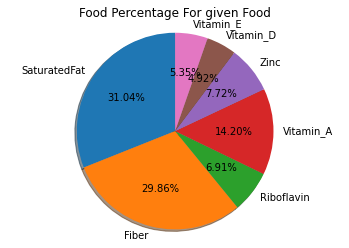

In [206]:
labels= columns_to_cluster
sizes= chartval
plt.pie(sizes,labels=labels, startangle=90, shadow=True,autopct='%1.2f%%')                   # explode=(0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1),
plt.title('Food Percentage For given Food')
plt.axis('equal')
plt.show()